## Part1: Predicting population density

In [286]:
import pandas as pd
df=pd.read_pickle("./df_analysis_part1")
import warnings; warnings.simplefilter('ignore')

In [287]:
df.shape

(73, 16)

In [288]:
from sklearn.linear_model import LinearRegression

In [289]:
from statsmodels.regression.linear_model import OLS

In [295]:
from sklearn.model_selection import train_test_split

In [300]:
X=df[['Travel', 'Outdoors', 'Food', 'Arts',
       'Shops', 'Residence', 'Professional', 'Distance_to_Downtown [Km]',
       'Ratio_commuting', 'Ratio_renting', 'Average_income',
       'Population_change_ratio']]
y=df.Population_density

In [301]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [302]:
result=OLS(y_train,X_train).fit()

In [303]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Population_density   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              152.6
Date:                Mon, 15 Feb 2021   Prob (F-statistic):                    7.80e-33
Time:                        18:33:30   Log-Likelihood:                         -512.87
No. Observations:                  58   AIC:                                      1050.
Df Residuals:                      46   BIC:                                      1074.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Travel                      134.4153    459.410      0.293      0.771    -790.329    1059.160
Outdoors                     63.0317    174.750      0.361      0.720    -288.723     414.786
Food                        436.3577     88.945      4.906      0.000     257.321     615.394
Arts                      -1233.5241    592.926     -2.080      0.043   -2427.022     -40.026
Shops                        65.7052     84.286      0.780      0.440    -103.954     235.364
Residence                   268.5246    359.988      0.746      0.460    -456.094     993.143
Professional                326.9827    145.015      2.255      0.029      35.082     618.883
Distance_to_Downtown [Km]    34.2108     42.805      0.799      0.428     -51.951     120.373
Ratio_commuting           -4721.7994   6630.903     -0.712      0.480   -1.81e+04    8625.516
Ratio_renting                1.9e+04   3743.820      5.075      0.000    1.15e+04    2.65e+04
Average_income               -0.0044      0.006     -0.759      0.452      -0.016       0.007
Population_change_ratio    2671.0416   2083.591      1.282      0.206   -1523.010    6865.093
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.912
Skew:                           0.299   Prob(JB):                        0.634
Kurtosis:                       3.141   Cond. No.                     2.03e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Quite a few factors: "Food","Arts","Residence","Professional","Ratio_renting" have statistically significant relationships ( at 0.05 significance). We will make the model for PREDICTION (not analysis) and hence still consider all the features not just the statistically significant ones.

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,random_state=0,test_size=0.3)

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
l=LinearRegression().fit(X_train,y_train)

In [181]:
l.coef_

array([-0.02128575,  0.03979316,  0.54729801, -0.15629165,  0.11486623,
        0.10478595,  0.21322136,  0.1439198 ,  0.06382973,  0.27088671,
        0.05449937,  0.07495217])

In [182]:
l.intercept_

0.0056509515181073534

In [183]:
y_pred=l.predict(X_test)

In [184]:
from sklearn.metrics import explained_variance_score,r2_score

In [185]:
import matplotlib.pyplot as plt

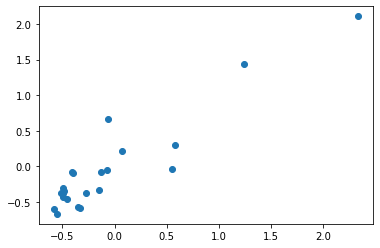

In [186]:
plt.scatter(y_test,y_pred)

In [187]:
y_pred.shape

(22,)

In [188]:
explained_variance_score(y_test,y_pred)

0.8517550048362175

In [189]:
r2_score(y_test,y_pred)

0.8510049354896208

## These scores suggest our prediction of Population density is quite good

## Next we look at a different problem: Can we predict whether people move in or out of neighborhoods (binary classification) by factors such as Population density, distance to downtown, etc

## Part2 : Predicting change in population by other factors

In [190]:
df=pd.read_pickle("./df_analysis_scaled")

In [191]:
x=df["Population_change_ratio"]>0

In [192]:
df["Pop_change_direction"]=x.astype(int)

In [193]:
df

,Population,Area,Population Change,Travel,Outdoors,Food,Arts,Shops,Residence,Professional,Distance_to_Downtown [Km],Ratio_commuting,Ratio_renting,Average_income,Population_density,Population_change_ratio,Pop_change_direction
0,0.339367,-0.139828,-0.480770,0.024579,0.088544,-0.394990,-0.330763,-0.517832,0.219225,-0.239143,0.240240,-0.282851,0.362417,-0.363314,-0.103868,-0.491152,0
1,-0.325515,-0.191230,-0.079046,-0.104122,-0.404600,-0.414596,-0.316934,-0.427676,-0.021613,-0.337047,-0.135931,0.064411,0.448880,-0.489573,-0.326732,-0.026165,0
2,0.214745,-0.664552,1.535975,0.317422,-0.019353,-0.031705,1.009584,0.063978,-0.213422,-0.003766,-1.423701,0.151230,1.203833,-0.031065,0.474941,2.284286,1
3,-0.292433,-0.058443,0.207539,-0.582889,-0.522679,-0.426607,-0.350116,0.066070,-0.383599,-0.459812,-0.145336,0.087502,0.282690,-0.359569,-0.369175,0.457845,1
4,-0.507331,-0.034884,-0.199227,0.522814,0.116807,-0.383656,-0.107697,-0.510618,-0.148474,-0.314616,0.349276,-0.716933,-0.089131,0.758836,-0.449816,-0.220756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-0.028751,0.331352,-0.546604,-0.582889,-0.476707,-0.381654,-0.414329,-0.519699,-0.383599,-0.274115,0.784214,-0.881388,-0.352555,-0.330127,-0.408741,-0.631258,0
69,0.287009,-0.853024,-0.495058,-0.582889,-0.003486,1.204437,0.224857,0.240615,-0.121548,-0.044154,-1.501432,1.792478,1.951611,-0.372394,1.238932,-0.512605,0
70,-0.904957,-0.649560,-0.015454,-0.290928,0.351551,-0.376103,0.442982,0.092714,-0.218039,-0.224773,-0.017943,-0.760341,-1.203584,1.501742,-0.353479,0.378767,1
71,-0.581347,-1.084330,0.108089,3.525804,0.291727,1.035593,1.849943,3.473570,2.722900,1.403630,-1.678736,2.126290,3.676963,-0.293693,2.333995,0.446781,1


In [194]:
y=df["Pop_change_direction"].values

In [195]:
X=df[['Travel', 'Outdoors', 'Food', 'Arts',
       'Shops', 'Residence', 'Professional', 'Distance_to_Downtown [Km]',
       'Ratio_commuting', 'Ratio_renting', 'Average_income',
       'Population_density']].values

In [196]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

## Classification by KNN

In [201]:
import numpy as np
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

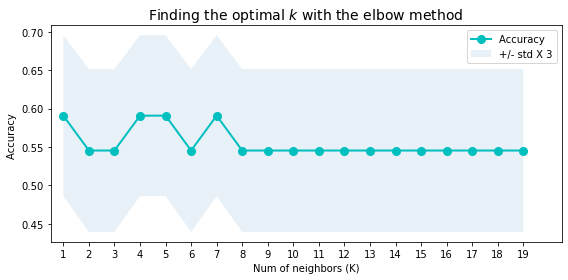

In [202]:
plt.figure(figsize=(8,4))
plt.plot(range(1,Ks),mean_acc,'co-', linewidth=2, markersize=8)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std X 3'))
plt.xlim(0.5,20.5)
plt.xticks(range(1,20))
plt.title('Finding the optimal $k$ with the elbow method', size=14)
plt.ylabel('Accuracy ')
plt.xlabel('Num of neighbors (K)')
plt.tight_layout()
plt.show()

### KNN is not doing quite good compared to just selecting at random (the shaded area in the above plot includes 0.5

## Can we do any better?

In [305]:
df=pd.read_pickle("./df_analysis_scaled")

In [417]:
x=df["Population_change_ratio"]>0

In [418]:
df["Pop_change_direction"]=x.astype(int)

In [419]:
sum(x)

22

In [428]:
y=df["Pop_change_direction"].values
X=df[['Travel', 'Outdoors', 'Food', 'Arts',
       'Shops', 'Residence', 'Professional', 'Distance_to_Downtown [Km]',
       'Ratio_commuting', 'Ratio_renting', 'Average_income',
       'Population_density']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [429]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(3, 10), 'max_features':np.arange(2, 9), 'criterion':['gini','entropy']}

grid_DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, iid=False)
grid_DT.fit(X_train, y_train)
print(f'Best params: {grid_DT.best_params_}')
print(f'Best score: {grid_DT.best_score_}')
best_tree = grid_DT.best_estimator_

Best params: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 5}
Best score: 0.73


In [430]:
yhat=best_tree.predict(X_test)

In [431]:
from sklearn.metrics import f1_score, accuracy_score

In [432]:
print('F1 score: ', f1_score(y_test, yhat, average='weighted'))
print('accuracy_score: ', accuracy_score(y_test, yhat))

F1 score:  0.6909090909090909
accuracy_score:  0.7333333333333333


In [433]:
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [434]:
from sklearn.metrics import plot_confusion_matrix

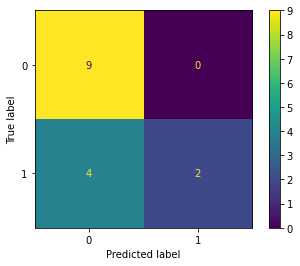

In [435]:
plot_confusion_matrix(best_tree,X_test,y_test)

## SVM is extremely slow for CPUs for this problem : Maybe use GPU in future from collab

## Logistic Regression

In [436]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [437]:
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
      "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
     }
lr=LogisticRegression(max_iter=10000)
logreg=GridSearchCV(lr,grid,cv=10,iid=False)
logreg.fit(X_train,y_train)
best_lr = logreg.best_estimator_

In [438]:
yhat = best_lr.predict(X_test)
best_lr

LogisticRegression(C=0.001, max_iter=10000, solver='newton-cg')

In [439]:
print('F1 score: ', f1_score(y_test, yhat, average='weighted'))
print('Accuracy: ', accuracy_score(y_test, yhat))

F1 score:  0.6205128205128204
Accuracy:  0.7333333333333333


In [440]:
from sklearn.metrics import classification_report

classification_report(y_test,yhat)

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.85        11\n           1       0.00      0.00      0.00         4\n\n    accuracy                           0.73        15\n   macro avg       0.37      0.50      0.42        15\nweighted avg       0.54      0.73      0.62        15\n'

In [441]:
from sklearn.metrics import confusion_matrix

In [442]:
confusion_matrix(y_test,yhat)

array([[11,  0],
       [ 4,  0]])

## Logistic regression does some what better with approximately 70% accuracy